Раскидывание данных для первого водителя по массивам:

In [77]:
%matplotlib inline
import pandas
import math
import matplotlib.pyplot as plt
import re
import datetime
import sort_coordinates

data = pandas.read_csv('data1.tsv', sep="\t")
debug = pandas.read_csv('debug1.tsv', sep="\t")
#debug[debug["hash"] == 86]
# names=['date', 'id', 'type', 'hash', 'latitude', 'longitude']
id_unique = data["id"].unique()
date_points = []
lat_points = []
lon_points = []

for i in id_unique:
    str_date = data[data["id"] == i]["date"].copy()
    datepstr = []
    format_date = "%Y-%m-%d %H:%M:%S"
    for s in str_date:
        search_date = re.search('(\d+-\d+-\d+\s\d+:\d+:\d+)', s)
        t = datetime.datetime.strptime(search_date.group(1), format_date)
        datepstr.append(t)
    date_points.append(datepstr)
    lat = sort_coordinates.del_invalid_idx(data[data["id"] == i]["latitude"].copy())
    lat_points.append(lat)
    lon = sort_coordinates.del_invalid_idx(data[data["id"] == i]["longitude"].copy())
    lon_points.append(lon)

In [32]:
min_eps = 10
max_eps = 0
eps = 0
idx = 0
jdx = 0
next_max_eps = 10
for j in range(len(lat_points) - 1):
    for i in range(len(lat_points[j]) - 2):
        
        max_eps = max(math.sqrt(math.pow(lat_points[j][i+1] - lat_points[j][i], 2)
                        + math.pow(lon_points[j][i+1] - lon_points[j][i], 2)), max_eps)
        
        min_eps = min(math.sqrt(math.pow(lat_points[j][i+1] - lat_points[j][i], 2)
                                + math.pow(lon_points[j][i+1] - lon_points[j][i], 2)), min_eps)
    q = next_max_eps
    next_max_eps = min(max_eps, next_max_eps)
    if (q < max_eps):
        idx = i
        jdx = j
    
print (min_eps, max_eps)

0.0 0.03393044821395047


In [3]:
start_points = []
f_points = []
next_points = 1
x = lat_points[0][0]
y = lon_points[0][0]
x_next = lat_points[0][next_points]
y_next = lon_points[0][next_points]
while (x + max_eps > x_next)and(y + max_eps > y_next)and(x - max_eps < x_next)and(y - max_eps < y_next):
    next_points += 1  
    f_points.append([lat_points[0][next_points], lon_points[0][next_points]])
    x_next = lat_points[0][next_points]
    y_next = lon_points[0][next_points]


id_points = len(lat_points[0]) - 1 - next_points
for i in range(id_points):
    x_next = lat_points[0][i+next_points]
    y_next = lon_points[0][i+next_points]
    if (x + max_eps > x_next)and(y + max_eps > y_next)and(x - max_eps < x_next)and(y - max_eps < y_next): 
        start_points.append([lat_points[0][i + next_points], lon_points[0][i + next_points]])   

2015-05-12 21:20:08 2015-05-12 03:19:46 2015-05-12 03:21:07


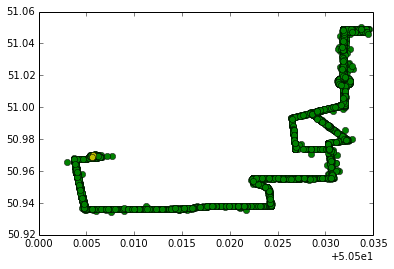

In [67]:

for j in range(len(lat_points) - 1):
    plt.plot(lat_points[j], lon_points[j], 'o', c = 'g')
plt.plot(lat_points[jdx][idx], lon_points[jdx][idx], 'o', c = 'y')
plt.plot(lat_points[jdx][idx+1], lon_points[jdx][idx+1], 'o', c = 'y')
print(date_points[jdx][idx-1], date_points[jdx][idx], date_points[jdx][idx+1])


Время так же важно. Между 1 и 2 временем значительно меньше времени, чем между 2 и 3. 
Соответственно нужно посмотреть на сколько большой/маленький отрезок пройден за время между точками. А значит нужно всё таки знать скорость.

In [68]:
speed = []
for j in range(len(lat_points) - 1):
    speed_hero = []
    for i in range(len(lat_points[j]) - 1):
        range_way = math.sqrt(math.pow(lat_points[j][i+1] - lat_points[j][i], 2)
                              + math.pow(lon_points[j][i+1] - lon_points[j][i], 2))
        range_time = (date_points[j][i + 1] - date_points[j][i]).total_seconds()
        speed_hero.append(range_way/range_time)
    speed.append(speed_hero)

In [69]:
import sort_coordinates

sort_speed = []

idx = 0

sort_lat = []
sort_lon = []
for i in range(len(speed)-1):
    temp_lat_points = sort_coordinates.del_invalid_idx(lat_points[i])
    temp_lon_points = sort_coordinates.del_invalid_idx(lon_points[i])
    lat = []
    lon = []
    sp = []
    temp_speed_array = speed[i].copy()
    while len(temp_speed_array) != 0:
        min_speed = 100000
        for i in range(len(temp_speed_array)-1):
            if min_speed > temp_speed_array[i]:
                min_speed = temp_speed_array[i]
                idx = i
        sp.append((idx, temp_speed_array.pop(idx)))
        
        lat.append(temp_lat_points.pop(idx))
        lon.append(temp_lon_points.pop(idx))
    sort_lat.append(lat)
    sort_lon.append(lon)
    sort_speed.append(sp)



Как отсортировать скорость сохраняя индекс вторым параметром?

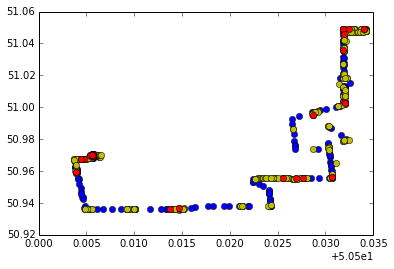

In [85]:
plt.plot(lat, lon, 'o')

for j in range(len(sort_speed)-1):
    ix = len(sort_lat[j])/10
    for i in range(int(ix)):
        plt.plot(sort_lat[j][i], sort_lon[j][i], 'o', c = 'y')

ix = len(sort_lat[0])/10
for i in range(int(ix)):
    plt.plot(sort_lat[0][i], sort_lon[0][i], 'o', c = 'r')

Нужно понять какая скорость максимальная для остановок, чтобы решить какое кол-во точек, где тормозит водитель брать. Плюс нельзя забывать о том, что их в любом случае должно быть значительно больше так как светафоры/пробки...

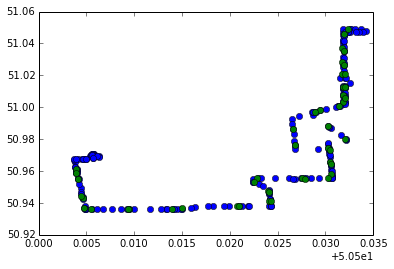

In [81]:
plt.plot(lat, lon, 'o')
plt.plot(debug["latitude"], debug["longitude"], 'o', c = 'g')